In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import math

In [80]:
PointX_g = []
PointY_g = []
tx_g = np.array([])
ty_g = np.array([])
for i in range(29):
    for j in range(0,10,2):
        file_path = "/home/anny/109-2/0420_treeExperiment/npy/1_gps_npy/np_"
        PointX, PointY, tx, ty = np.load(file_path+str(i)+"_"+str(j)+".npy", allow_pickle=True)
        PointX_g.append(PointX)
        PointY_g.append(PointY)
        tx_g = np.append(tx_g,tx)
        ty_g = np.append(ty_g,ty)
        

In [77]:

print(type(PointX_g[0]))

<type 'numpy.ndarray'>


In [34]:
np.array([[0, 1, 2, 3], [2, 3, 4]])

array([list([0, 1, 2, 3]), list([2, 3, 4])], dtype=object)

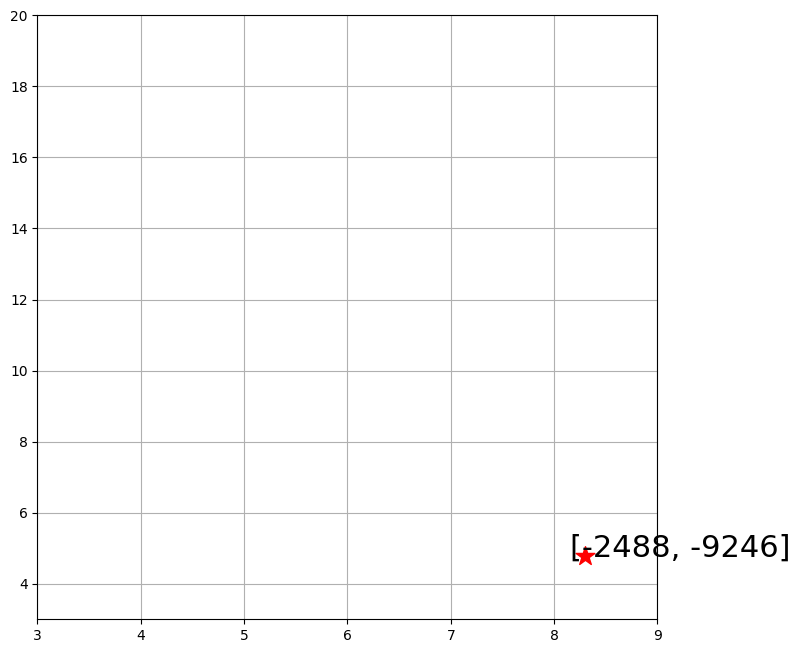

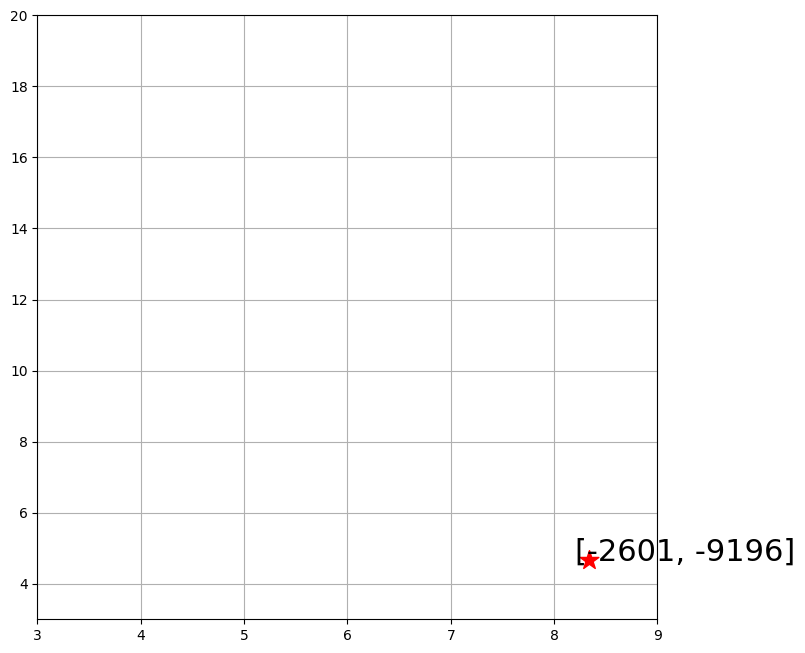

In [16]:
for i in range(1):
    for j in range(0,3,2):
        file_path = "/home/anny/109-2/0420_treeExperiment/npy/1_gps_npy/np_"
        PointX, PointY, tx, ty = np.load(file_path+str(i)+"_"+str(j)+".npy", allow_pickle=True)
        
        fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
        plt.grid(True)
        base = plt.gca().transData
        rotation = transforms.Affine2D().rotate_deg(135)#92
        textBase_footprint = "["+str(math.trunc(tx*1000))+", "+str(math.trunc(ty*1000))+"]"
        plt.text(tx+0.1, ty+0.1, textBase_footprint, transform=rotation + base,fontsize=22)
        plt.scatter(PointX, PointY, c='b', transform=rotation + base)
        plt.scatter(tx, ty, c='r',transform=rotation + base, s=200, marker='*')
        # plt.title(str(textStamp), fontsize = 25)
        plt.xlim((3, 9))
        plt.ylim((3, 20))
        plt.show()

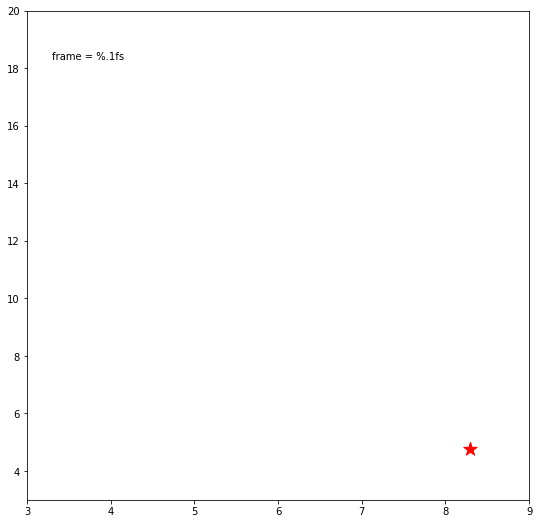

In [86]:
fig, ax = plt.subplots(figsize=(9,9))
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(135)#92

baseFoot = ax.scatter([tx_g[i]],[ty_g[i]],linestyle='None',marker='*',s=200, color='r', transform=rotation + base)

scan = ax.scatter([PointX_g[i]],[PointY_g[i]],linestyle='None', marker='o', transform=rotation + base, color='orange')

frame_template = 'frame = %.1fs'
fra_text = ax.text(0.05,0.9,frame_template,transform=ax.transAxes)
i=0
plt.xlim((3, 9))
plt.ylim((3, 20))
plt.show()

In [17]:
import matplotlib.animation as animation

RuntimeError: Error creating movie, return code: 1

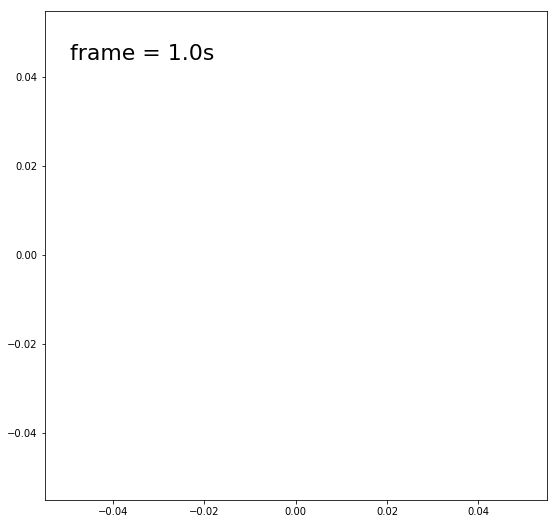

In [93]:
fig, ax = plt.subplots(figsize=(9,9))
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(135)#92

plt.rcParams['animation.html'] = 'html5'

baseFoot, = ax.plot([],[],linestyle='None',marker='*', color='r', transform=rotation + base)
scan, = ax.plot([],[],linestyle='None', marker='o', transform=rotation + base, color='orange')

# baseFoot = ax.scatter([],[],linestyle='None',marker='*',s=200, color='r', transform=rotation + base)
# scan = ax.scatter([],[],linestyle='None', marker='o', transform=rotation + base, color='orange')

frame_template = 'frame = %.1fs'
fra_text = ax.text(0.05,0.9,'',transform=ax.transAxes, fontsize = 22)

def init():
    baseFoot.set_data([],[])
    scan.set_data([],[])
#     line.set_data([],[])
    fra_text.set_text('')
    #wgt_text.set_text('')
    return baseFoot, scan, fra_text#, wgt_text

def animate(i):
    baseFoot.set_data([tx_g[i]],[ty_g[i]])
    scan.set_data([PointX_g[i]],[PointY_g[i]])
    
    fra_text.set_text(frame_template % i)
    #wgt_text.set_text(wgt_template % m2[i])
    return baseFoot, scan, time_text#, wgt_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,147), \
         interval=40,blit=False,init_func=init)

ani_a.save('Pendulum_Control_try.mp4',fps=30)
plt.show()

RuntimeError: Error creating movie, return code: 1

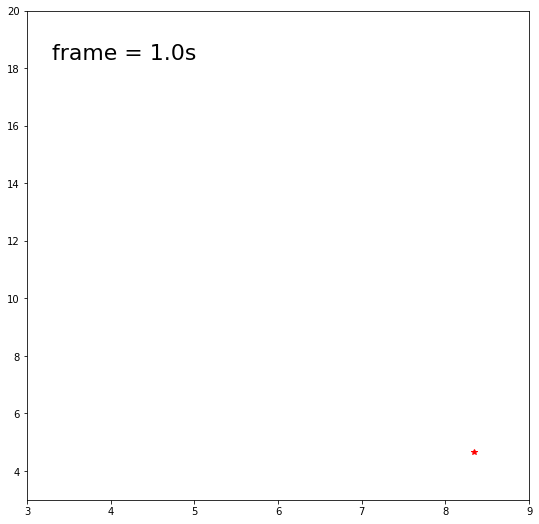

In [94]:
fig, ax = plt.subplots(figsize=(9,9))
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(135)#92
plt.xlim((3, 9))
plt.ylim((3, 20))
plt.rcParams['animation.html'] = 'html5'

baseFoot, = ax.plot([],[],linestyle='None',marker='*', color='r', transform=rotation + base)

scan, = ax.plot([],[],linestyle='None', marker='o', transform=rotation + base, color='orange')

frame_template = 'frame = %.1fs'
fra_text = ax.text(0.05,0.9,'',transform=ax.transAxes, fontsize = 22)

def init():
    baseFoot.set_data([],[])
    scan.set_data([],[])
#     line.set_data([],[])
    fra_text.set_text('')
    #wgt_text.set_text('')
    return baseFoot, scan, fra_text#, wgt_text

def animate(i):
    baseFoot.set_data([tx_g[i]],[ty_g[i]])
    scan.set_data([PointX_g[i]],[PointY_g[i]])
    
    fra_text.set_text(frame_template % i)
    #wgt_text.set_text(wgt_template % m2[i])
    return baseFoot, scan, time_text#, wgt_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,144), \
         interval=400,blit=False,init_func=init)

ani_a.save('GPS_Control_try.mp4',fps=5)
plt.show()